In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
from importlib import reload
import cartopy.crs as ccrs

In [9]:
func=reload(func)

In [10]:
#read in HadEX data
hadex_ds = xr.open_dataset('HadEX3_Rx1day_1901-2018_ADW_61-90_1.25x1.875deg.nc')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Ann' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Jan' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Feb' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'Mar' has multiple fill values {-99.9, -99.9}, decoding all values to NaN.
  new_vars[k] = deco

In [11]:
ann = hadex_ds.Ann

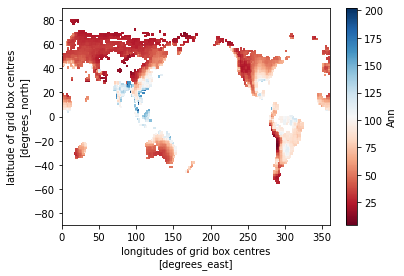

In [40]:
ann.mean(dim='time').plot(cmap='RdBu')

In [13]:
hadex_ds

<xarray.Dataset>
Dimensions:           (latitude: 144, longitude: 192, ncbnd: 2, time: 118)
Coordinates:
  * longitude         (longitude) float64 0.9375 2.812 4.688 ... 357.2 359.1
  * latitude          (latitude) float64 -89.38 -88.12 -86.88 ... 88.12 89.38
  * time              (time) int64 1901 1902 1903 1904 ... 2015 2016 2017 2018
Dimensions without coordinates: ncbnd
Data variables:
    longitude_bounds  (longitude, ncbnd) float32 ...
    latitude_bounds   (latitude, ncbnd) float32 ...
    Ann               (time, latitude, longitude) float32 nan nan ... nan nan
    Jan               (time, latitude, longitude) float32 ...
    Feb               (time, latitude, longitude) float32 ...
    Mar               (time, latitude, longitude) float32 ...
    Apr               (time, latitude, longitude) float32 ...
    May               (time, latitude, longitude) float32 ...
    Jun               (time, latitude, longitude) float32 ...
    Jul               (time, latitude, longitude) float32 ...
    Aug               (time, latitude, longitude) float32 ...
    Sep               (time, latitude, longitude) float32 ...
    Oct               (time, latitude, longitude) float32 ...
    Nov               (time, latitude, longitude) float32 ...
    Dec               (time, latitude, longitude) float32 ...
Attributes:
    title:                      Rx1day
    institution:                Met Office Hadley Centre, Exeter, UK
    source:                     HadEX3 data product
    references:                 Dunn, Alexander et al. 2020, Journal of Geoph...
    creator_name:               Robert Dunn
    creator_url:                www.metoffice.gov.uk
    creator_email:              robert.dunn@metoffice.gov.uk
    keywords:                   extremes indices, gridded, temperature, preci...
    summary:                    Gridded dataset of extremes indices
    hadex_version:              3.0.3
    licence:                    HadEX3 is distributed under the Open Governme...
    processing_level:           Daily TX, TN and P observations, converted to...
    time_coverage_start:        1901-01-01T00:00Z
    time_coverage_end:          2019-01-01T00:00Z
    geospatial_lat_min:         -90
    geospatial_lat_max:         90
    geospatial_lat_units:       degrees
    geospatial_lon_min:         0
    geospatial_lon_max:         360
    geospatial_lon_units:       degrees
    cdm_data_type:              grid
    acknowledgement:            RJHD was supported by Met Office Hadley Centr...
    history:                    Created by netcdf_procs.py
    date_created:               Fri Dec 11, 00:14 2020
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0,CF Discrete Sa...
    geospatial_lat_resolution:  1.25
    geospatial_lon_resolution:  1.875
    time_coverage_resolution:   Monthly

In [14]:
TXx_jan = hadex_ds.Jan
TXx_feb = hadex_ds.Feb
TXx_mar = hadex_ds.Mar
TXx_apr = hadex_ds.Apr
TXx_may = hadex_ds.May
TXx_jun = hadex_ds.Jun
TXx_jul = hadex_ds.Jul
TXx_aug = hadex_ds.Aug
TXx_sep = hadex_ds.Sep
TXx_oct = hadex_ds.Oct
TXx_nov = hadex_ds.Nov
TXx_dec = hadex_ds.Dec

In [15]:
TXx_jan

<xarray.DataArray 'Jan' (time: 118, latitude: 144, longitude: 192)>
[3262464 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * latitude   (latitude) float64 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * time       (time) int64 1901 1902 1903 1904 1905 ... 2015 2016 2017 2018
Attributes:
    FillValue:      -99.9
    long_name:      Max 1-day PR
    standard_name:  Rx1day
    units:          mm
    definition:     Monthly 1-day precipitation total
    team:           ETCCDI

In [16]:
#find seasonal maximum of TXx 
max_TXx_dec_jan = np.maximum(TXx_dec, TXx_jan)
seasonal_TXx_djf = np.maximum(max_TXx_dec_jan, TXx_feb)
max_TXx_sep_oct = np.maximum(TXx_sep, TXx_oct)
seasonal_TXx_son = np.maximum(max_TXx_sep_oct, TXx_nov)
max_TXx_jun_jul = np.maximum(TXx_jun, TXx_jul)
seasonal_TXx_jja = np.maximum(max_TXx_jun_jul, TXx_aug)
max_TXx_mar_apr = np.maximum(TXx_mar, TXx_apr)
seasonal_TXx_mam = np.maximum(max_TXx_mar_apr, TXx_may)

In [17]:
#read in obs data
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1950_2018.nc')
ersst_sst = ersst_ds.sst

In [18]:
#calculate nino34 index
nino34_index =  func.nino34_index(ersst_sst, '1950-01', '1979-12')

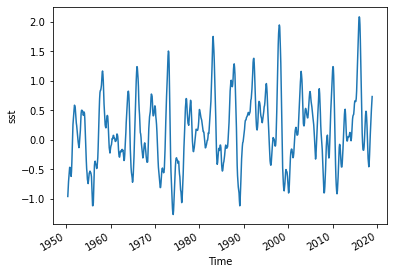

In [19]:
nino34_index.plot()

In [20]:
#calculate seasonal mean Nino34 index
seasonyear = (nino34_index.time.dt.year + (nino34_index.time.dt.month//12))
nino34_index.coords['seasonyear'] = seasonyear
    
def seasonal_mean(data):
    return data.groupby('time.season').mean()
    
yearly_seasonal_nino34_index = nino34_index.groupby('seasonyear').apply(seasonal_mean)
yearly_seasonal_nino34_index_1950_2018 = yearly_seasonal_nino34_index.drop_sel(seasonyear=2019)

### Linear regression between TXx and Nino34

In [21]:
#select time slice of HadEX data to match nino34 index
seasonal_TXx_djf_1950_2018 = seasonal_TXx_djf.sel(time=slice('1950', '2018'))
seasonal_TXx_son_1950_2018 = seasonal_TXx_son.sel(time=slice('1950', '2018'))
seasonal_TXx_jja_1950_2018 = seasonal_TXx_jja.sel(time=slice('1950', '2018'))
seasonal_TXx_mam_1950_2018 = seasonal_TXx_mam.sel(time=slice('1950', '2018'))
#give nino_index same lat, lon as HadEX data
nino34_index_grid = yearly_seasonal_nino34_index_1950_2018.expand_dims(latitude=seasonal_TXx_son.latitude.values, longitude=seasonal_TXx_son.longitude.values)
#transpose nino34 index so time is index 0
nino34_index_grid = nino34_index_grid.transpose('seasonyear', 'latitude', 'longitude', 'season')
#select season
nino34_index_grid_djf = nino34_index_grid.sel(season='DJF')
nino34_index_grid_son = nino34_index_grid.sel(season='SON')
nino34_index_grid_jja = nino34_index_grid.sel(season='JJA')
nino34_index_grid_mam = nino34_index_grid.sel(season='MAM')

In [22]:
 def multi_apply_along_axis(func1d, axis, arrs, *args, **kwargs):
        carrs = np.concatenate(arrs, axis)
    
        offsets=[]
        start=0
        for i in range(len(arrs)-1):
            start += arrs[i].shape[axis]
            offsets.append(start)
    
        def helperfunc(a, *args, **kwargs):
            arrs = np.split(a, offsets)
            return func1d(*[*arrs, *args], **kwargs)
  
        return np.apply_along_axis(helperfunc, axis, carrs, *args, **kwargs)

In [23]:
grad_son = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_son_1950_2018, nino34_index_grid_son])[0, :, :]
grad_djf = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_djf_1950_2018, nino34_index_grid_djf])[0, :, :]
grad_jja = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_jja_1950_2018, nino34_index_grid_jja])[0, :, :]
grad_mam = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_mam_1950_2018, nino34_index_grid_mam])[0, :, :]

### Make plot of regression

In [24]:
grad_son_xr = xr.DataArray(grad_son, dims=['lat', 'lon'])
grad_son_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
grad_son_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
grad_djf_xr = xr.DataArray(grad_djf, dims=['lat', 'lon'])
grad_djf_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
grad_djf_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
grad_jja_xr = xr.DataArray(grad_jja, dims=['lat', 'lon'])
grad_jja_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
grad_jja_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
grad_mam_xr = xr.DataArray(grad_mam, dims=['lat', 'lon'])
grad_mam_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
grad_mam_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values

Text(0, 0.5, 'Grad')

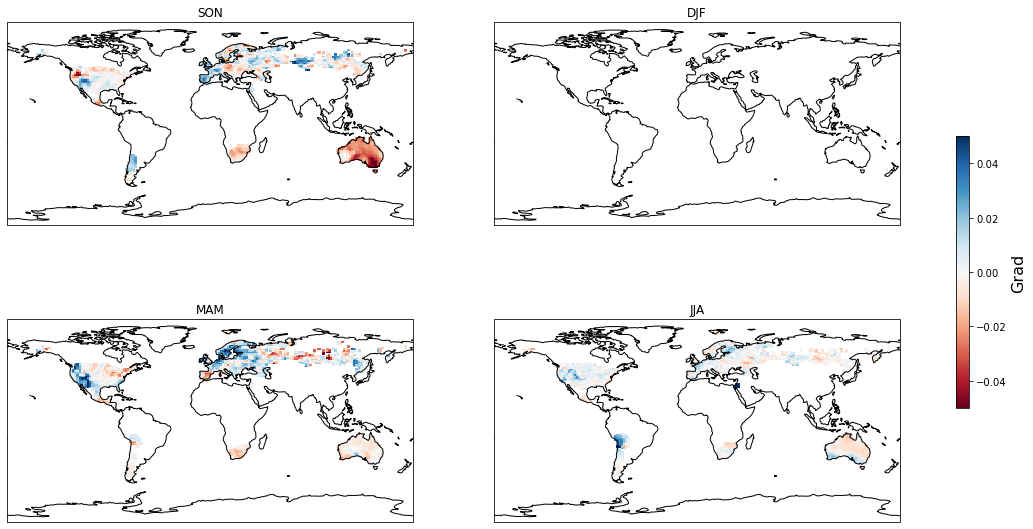

In [30]:
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -0.05
vmax = 0.05


ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = grad_son_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = grad_djf_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = grad_mam_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = grad_jja_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('Grad', fontsize=16)

In [31]:
#r and p values
r_son = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_son_1950_2018, nino34_index_grid_son])[2, :, :]
p_son = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_son_1950_2018, nino34_index_grid_son])[3, :, :]
r_djf = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_djf_1950_2018, nino34_index_grid_djf])[2, :, :]
p_djf = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_djf_1950_2018, nino34_index_grid_djf])[3, :, :]
r_mam = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_mam_1950_2018, nino34_index_grid_mam])[2, :, :]
p_mam = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_mam_1950_2018, nino34_index_grid_mam])[3, :, :]
r_jja = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_jja_1950_2018, nino34_index_grid_jja])[2, :, :]
p_jja = multi_apply_along_axis(stats.linregress, 0, [seasonal_TXx_jja_1950_2018, nino34_index_grid_jja])[3, :, :]

In [33]:
r_son_xr = xr.DataArray(r_son, dims=['lat', 'lon'])
r_son_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
r_son_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
p_son_xr = xr.DataArray(p_son, dims=['lat', 'lon'])
p_son_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
p_son_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
r_djf_xr = xr.DataArray(r_djf, dims=['lat', 'lon'])
r_djf_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
r_djf_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
p_djf_xr = xr.DataArray(p_djf, dims=['lat', 'lon'])
p_djf_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
p_djf_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
r_mam_xr = xr.DataArray(r_mam, dims=['lat', 'lon'])
r_mam_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
r_mam_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
p_mam_xr = xr.DataArray(p_mam, dims=['lat', 'lon'])
p_mam_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
p_mam_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
r_jja_xr = xr.DataArray(r_jja, dims=['lat', 'lon'])
r_jja_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
r_jja_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values
p_jja_xr = xr.DataArray(p_jja, dims=['lat', 'lon'])
p_jja_xr['lat'] = seasonal_TXx_son_1950_2018.latitude.values
p_jja_xr['lon'] = seasonal_TXx_son_1950_2018.longitude.values

Text(0, 0.5, 'r')

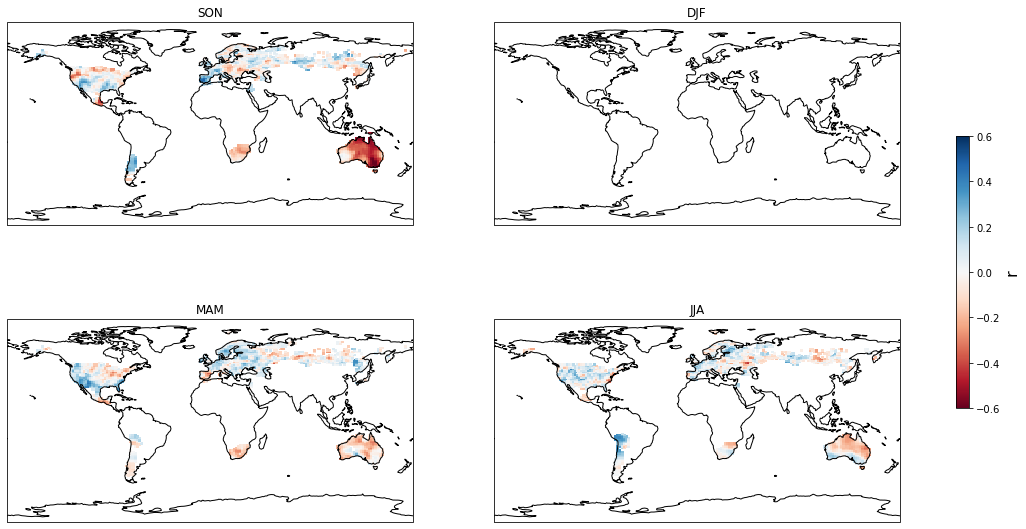

In [36]:
fig = plt.figure(figsize=(20,10))
axs = []

vmin = -0.6
vmax = 0.6


ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = r_son_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = r_djf_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = r_mam_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = r_jja_xr.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('r', fontsize=16)

In [37]:
p_son_sig = p_son_xr.where(p_son_xr.data<0.05)
p_djf_sig = p_djf_xr.where(p_djf_xr.data<0.05)
p_mam_sig = p_mam_xr.where(p_mam_xr.data<0.05)
p_jja_sig = p_jja_xr.where(p_jja_xr.data<0.05)

Text(0, 0.5, 'p')

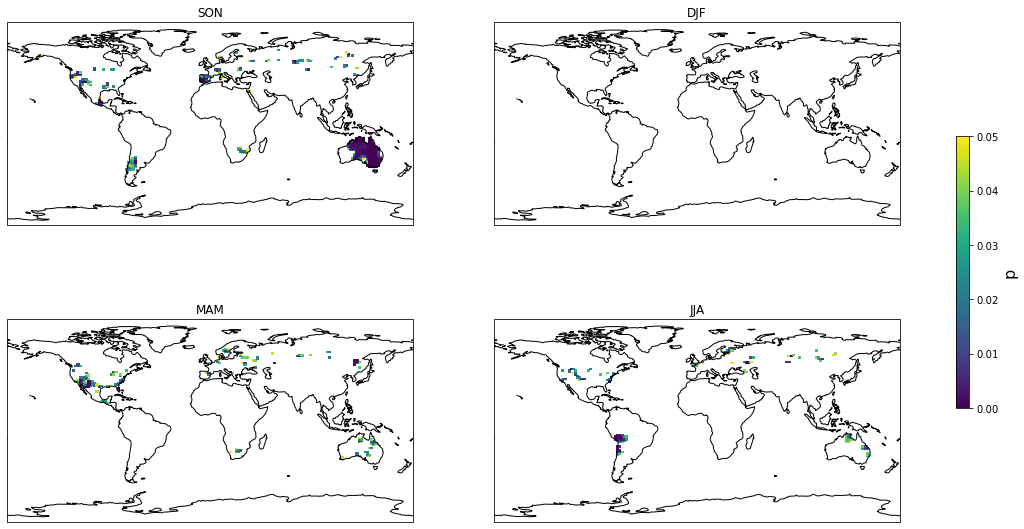

In [39]:
fig = plt.figure(figsize=(20,10))
axs = []

vmin = 0
vmax = 0.05


ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
C = p_son_sig.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('SON')
axs.append(ax)

ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
C = p_djf_sig.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('DJF')
axs.append(ax)

ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
C = p_mam_sig.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('MAM')
axs.append(ax)

ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
C = p_jja_sig.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('JJA')
axs.append(ax)

cbar = plt.colorbar(C, ax=axs, shrink=0.5, pad=0.05)
cbar.ax.set_ylabel('p', fontsize=16)